In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [158]:
loan_df = pd.read_csv('loan_approval_dataset.csv')

In [159]:
loan_df.sample(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
43,44,2,Graduate,Yes,800000,2300000,12,342,2200000,1300000,1800000,800000,Rejected
1691,1692,1,Not Graduate,Yes,8900000,32000000,16,711,4300000,1200000,22100000,5200000,Approved
776,777,5,Not Graduate,No,3100000,10800000,10,681,5100000,1700000,7400000,1500000,Approved
1461,1462,3,Not Graduate,No,4100000,12200000,2,457,700000,500000,14100000,4900000,Rejected
3392,3393,2,Not Graduate,No,400000,1500000,4,743,700000,500000,1200000,300000,Approved
3933,3934,0,Not Graduate,No,9800000,20100000,16,606,6200000,800000,37300000,8700000,Approved
1944,1945,0,Graduate,Yes,4700000,17700000,16,887,1300000,4900000,13200000,6700000,Approved
817,818,0,Not Graduate,No,5200000,18400000,14,600,7300000,9700000,16500000,3600000,Approved
3065,3066,2,Not Graduate,No,2000000,4000000,14,502,4900000,1500000,5400000,1300000,Rejected
3642,3643,2,Not Graduate,No,7600000,19300000,12,463,5400000,1500000,16000000,9600000,Rejected


In [160]:
loan_df.shape

(4269, 13)

In [161]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [162]:
loan_df.duplicated().sum()

0

In [163]:
loan_df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [164]:
loan_df.drop(columns='loan_id', inplace=True)

In [165]:
loan_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [166]:
loan_df = loan_df.copy()

In [167]:
# Strip any leading or trailing spaces from column names
loan_df.columns = loan_df.columns.str.strip()

loan_df['Immovable Assets'] = loan_df['residential_assets_value'] + loan_df['commercial_assets_value']
loan_df['Movable Assets'] = loan_df['luxury_assets_value'] + loan_df['bank_asset_value']

In [168]:
loan_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Immovable Assets,Movable Assets
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,20000000,30700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,4900000,12100000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,11600000,46100000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,21500000,31200000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,20600000,34400000


In [169]:
loan_df.drop(columns=['bank_asset_value', 'luxury_assets_value', 'commercial_assets_value', 'residential_assets_value'],inplace= True )

In [170]:
loan_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Immovable Assets,Movable Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,20000000,30700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,4900000,12100000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,11600000,46100000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,21500000,31200000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,20600000,34400000


In [171]:
pd.options.display.float_format = lambda x: f'{x:.4f}'
loan_df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Immovable Assets,Movable Assets
count,4269.0000,4269.0000,4269.0000,4269.0000,4269.0000,4269.0000,4269.0000
mean,2.4987,5059123.9166,15133450.4568,10.9004,599.9361,12445771.8435,20102998.3603
std,1.6959,2806839.8318,9043362.9848,5.7092,172.4304,9232541.1643,11836583.5377
min,0.0000,200000.0000,300000.0000,2.0000,300.0000,-100000.0000,300000.0000
25%,1.0000,2700000.0000,7700000.0000,6.0000,453.0000,4900000.0000,10000000.0000
50%,3.0000,5100000.0000,14500000.0000,10.0000,600.0000,10600000.0000,19600000.0000
75%,4.0000,7500000.0000,21500000.0000,16.0000,748.0000,18200000.0000,29100000.0000
max,5.0000,9900000.0000,39500000.0000,20.0000,900.0000,46600000.0000,53800000.0000


<Axes: xlabel='loan_status', ylabel='count'>

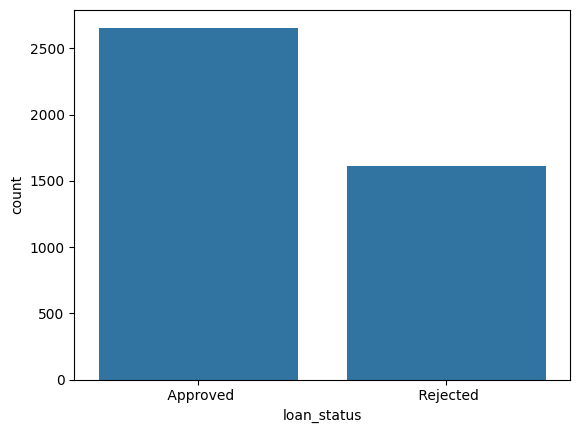

In [172]:
sns.countplot(data=loan_df, x='loan_status')

<Axes: xlabel='income_annum', ylabel='Count'>

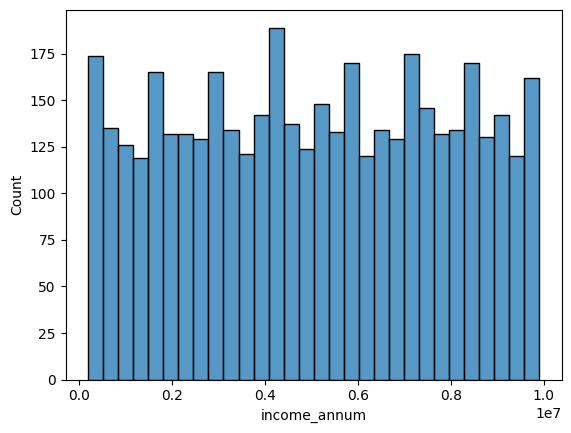

In [173]:
sns.histplot(data=loan_df, x='income_annum', bins=30)

<Axes: xlabel='education', ylabel='cibil_score'>

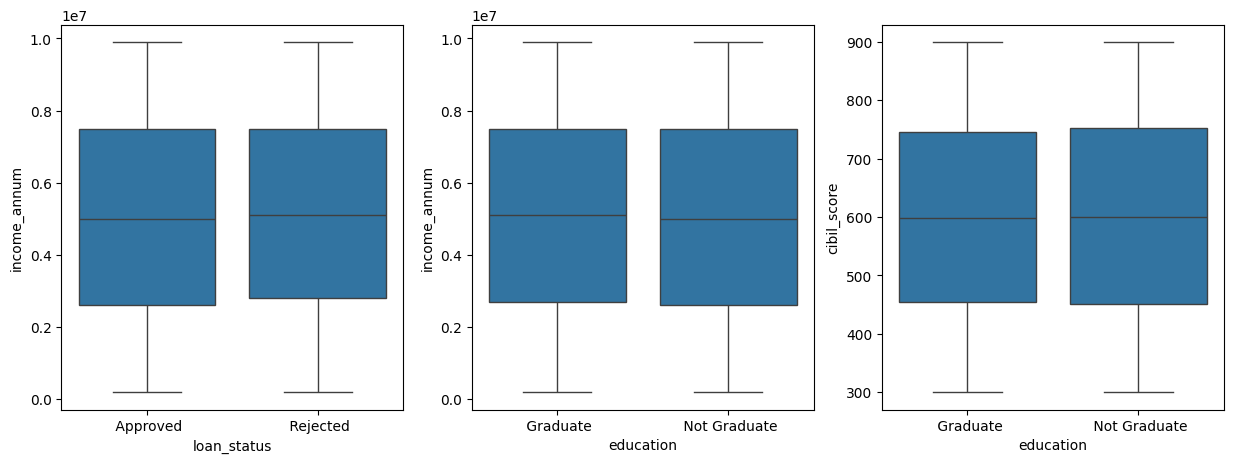

In [174]:
fig, ax = plt.subplots (1,3, figsize=(15, 5))
sns.boxplot(loan_df, x='loan_status', y='income_annum', ax=ax[0])
sns.boxplot(loan_df, x='education', y='income_annum', ax=ax[1])
sns.boxplot(loan_df, x='education', y='cibil_score', ax=ax[2])

<Axes: xlabel='education', ylabel='cibil_score'>

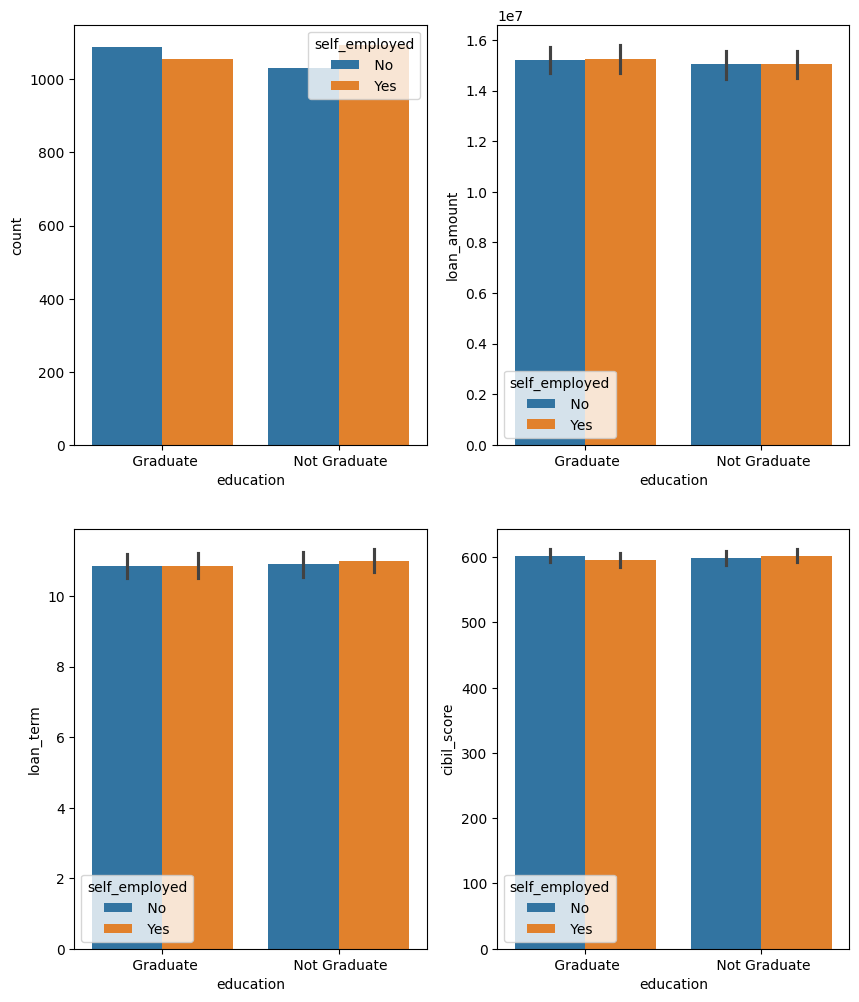

In [175]:
fig, ax = plt.subplots(2, 2, figsize=(10, 12))
sns.countplot(loan_df, x='education', hue='self_employed', ax=ax[0, 0])
sns.barplot(loan_df, x='education', hue='self_employed', y='loan_amount', ax=ax[0, 1])
sns.barplot(loan_df, x='education', hue='self_employed', y='loan_term', ax=ax[1, 0])
sns.barplot(loan_df, x='education', hue='self_employed', y='cibil_score', ax=ax[1, 1])


<Axes: xlabel='loan_term', ylabel='loan_amount'>

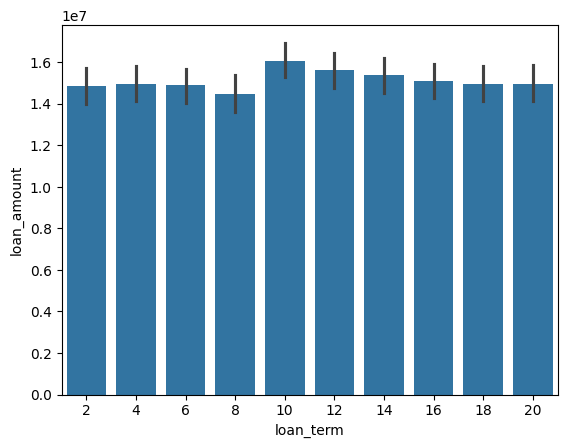

In [176]:
sns.barplot(x='loan_term', y='loan_amount', data= loan_df)

<Axes: xlabel='Immovable Assets', ylabel='Count'>

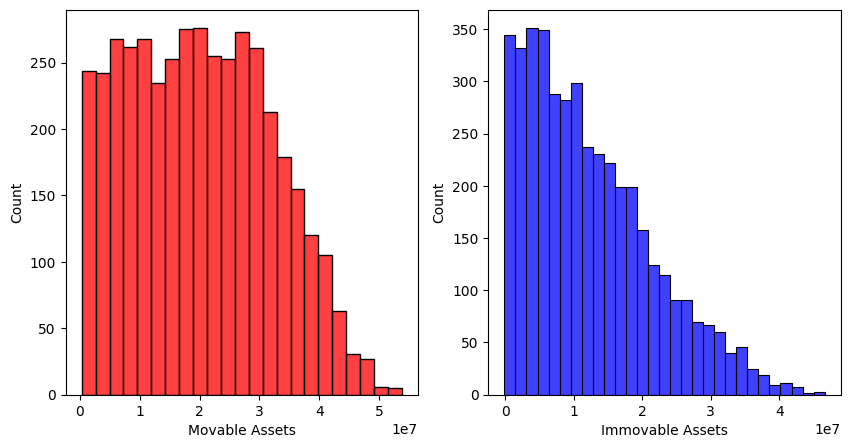

In [177]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=loan_df, x='Movable Assets', ax=ax[0], color='red')
sns.histplot(data=loan_df, x='Immovable Assets', ax=ax[1], color='blue')

Text(0.5, 0, 'Number of dependents')

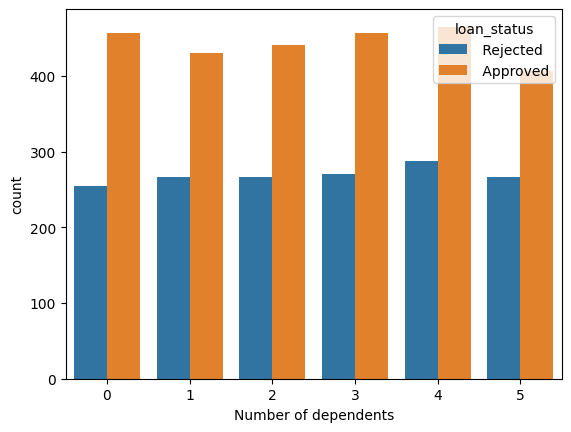

In [178]:
sns.countplot(loan_df, x='no_of_dependents', hue='loan_status')
plt.xlabel('Number of dependents')

<Axes: xlabel='loan_term', ylabel='loan_amount'>

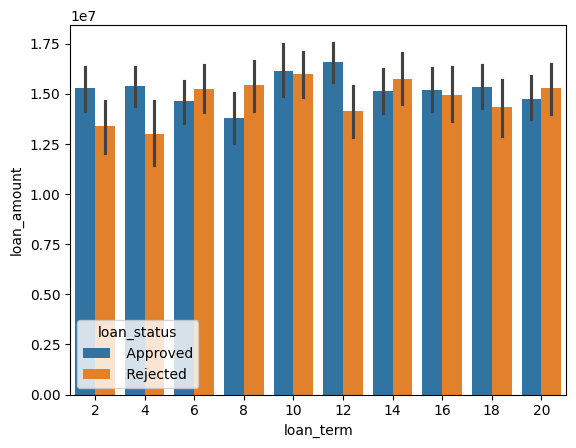

In [179]:
sns.barplot(data=loan_df, x='loan_term', y='loan_amount', hue='loan_status')

<Axes: xlabel='loan_status', ylabel='cibil_score'>

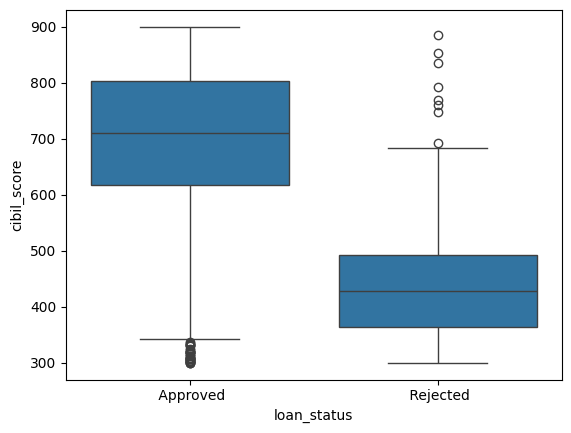

In [180]:
sns.boxplot(data=loan_df, x='loan_status', y='cibil_score')

<Axes: xlabel='income_annum', ylabel='loan_amount'>

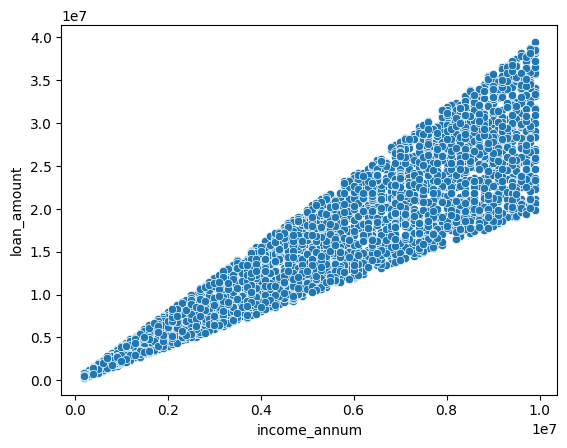

In [192]:
sns.scatterplot(loan_df, x='income_annum', y='loan_amount')

<Axes: xlabel='Immovable Assets', ylabel='loan_amount'>

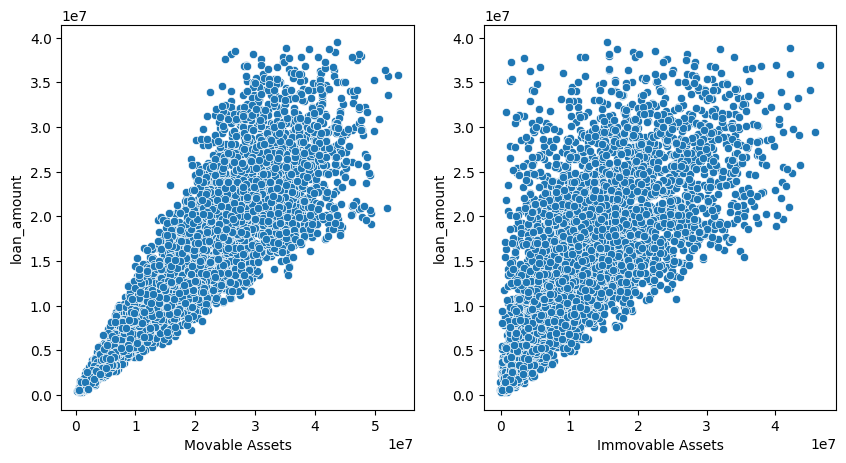

In [193]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(x='Movable Assets', y='loan_amount', data= loan_df, ax=ax[0])
sns.scatterplot(x='Immovable Assets', y='loan_amount', data= loan_df, ax=ax[1])

<Axes: xlabel='Immovable Assets', ylabel='Count'>

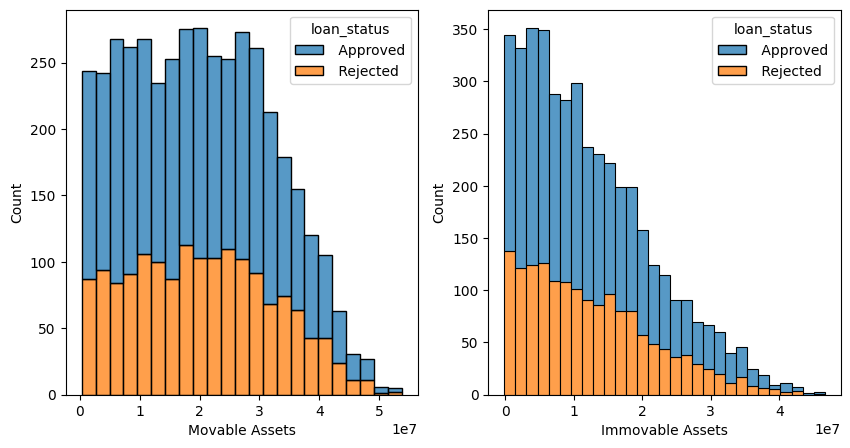

In [182]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data= loan_df, x='Movable Assets', ax=ax[0], hue='loan_status', multiple='stack')
sns.histplot(data= loan_df, x='Immovable Assets', ax=ax[1], hue='loan_status', multiple='stack')

In [183]:
loan_df['education'] = loan_df['education'].astype(str).str.strip().map({'Not Graduate': 0, 'Graduate': 1})
loan_df['self_employed'] = loan_df['self_employed'].astype(str).str.strip().map({'No': 0, 'Yes': 1})
loan_df['loan_status'] = loan_df['loan_status'].astype(str).str.strip().map({'Rejected': 0, 'Approved': 1})

In [184]:
loan_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Immovable Assets,Movable Assets
0,2,1,0,9600000,29900000,12,778,1,20000000,30700000
1,0,0,1,4100000,12200000,8,417,0,4900000,12100000
2,3,1,0,9100000,29700000,20,506,0,11600000,46100000
3,3,1,0,8200000,30700000,8,467,0,21500000,31200000
4,5,0,1,9800000,24200000,20,382,0,20600000,34400000


<Axes: >

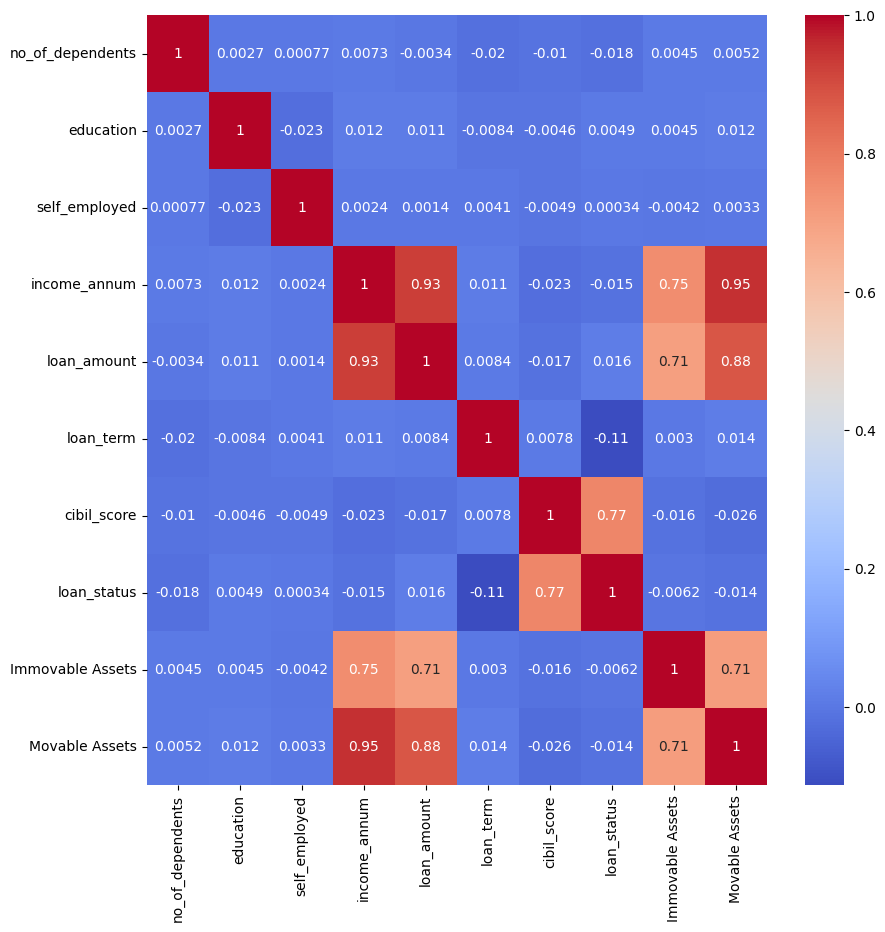

In [188]:
plt.figure(figsize=(10, 10))
sns.heatmap(loan_df.corr(), annot=True, cmap='coolwarm')

In [195]:
from sklearn.model_selection import train_test_split

In [198]:
X = loan_df.drop(columns=['loan_status'])
y = loan_df['loan_status']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [223]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import  XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

In [206]:
rfc_pipeline = Pipeline( steps=[
    ('scaler', StandardScaler()), 
    ('classifier', RandomForestClassifier(random_state=42))
])

In [207]:
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [213]:
def f1(actual, pred):
    f1 = f1_score(actual, pred, pos_label=1)
    print(f'F1 Score: {f1 * 100 :.2f}')

In [214]:
rfc_pred = rfc_pipeline.predict(X_test)

f1(y_test, rfc_pred)

F1 Score: 98.43


In [210]:
xgb_pipeline = Pipeline( steps= [
    ('scaler', StandardScaler()), 
    ('classifier', XGBClassifier(random_state=42))
])

In [211]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [216]:
xgb_pred = xgb_pipeline.predict(X_test)

f1(y_test, xgb_pred)

F1 Score: 98.80


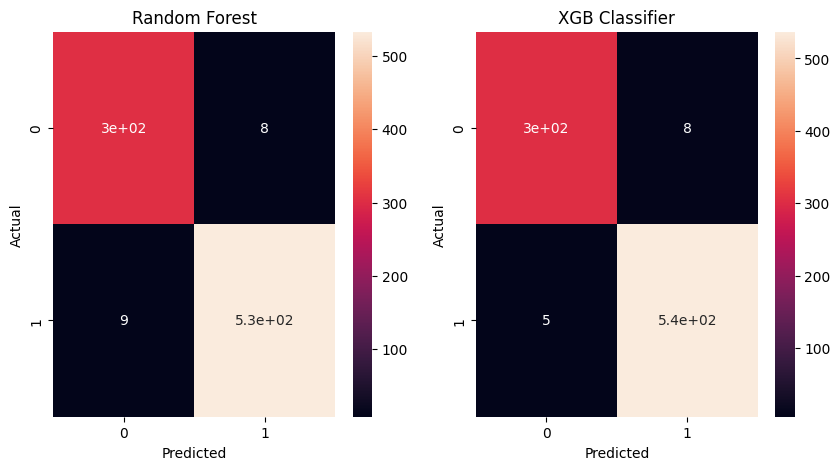

In [221]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[0])
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, ax=ax[1])
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
ax[0].set_title('Random Forest')
ax[1].set_title('XGB Classifier')
plt.show()



In [224]:
print(classification_report(y_test, rfc_pred))
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       312
           1       0.99      0.98      0.98       542

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       312
           1       0.99      0.99      0.99       542

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

